In [1]:
# Iris Dataset Decision Tree Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import export_text
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
#1. DATA LOADING AND EXPLORATION

print("🌸 Iris Dataset Decision Tree Analysis")
print("=" * 50)
print("\n1. LOADING THE IRIS DATASET")
print("-" * 30)

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Basic statistics
print("\nDataset Statistics:")
print(df.describe())

# Class distribution
print("\nClass Distribution:")
print(df['species'].value_counts())

🌸 Iris Dataset Decision Tree Analysis

1. LOADING THE IRIS DATASET
------------------------------
Dataset shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa', 'versicolor', 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mea



2. DATA VISUALIZATION
-------------------------


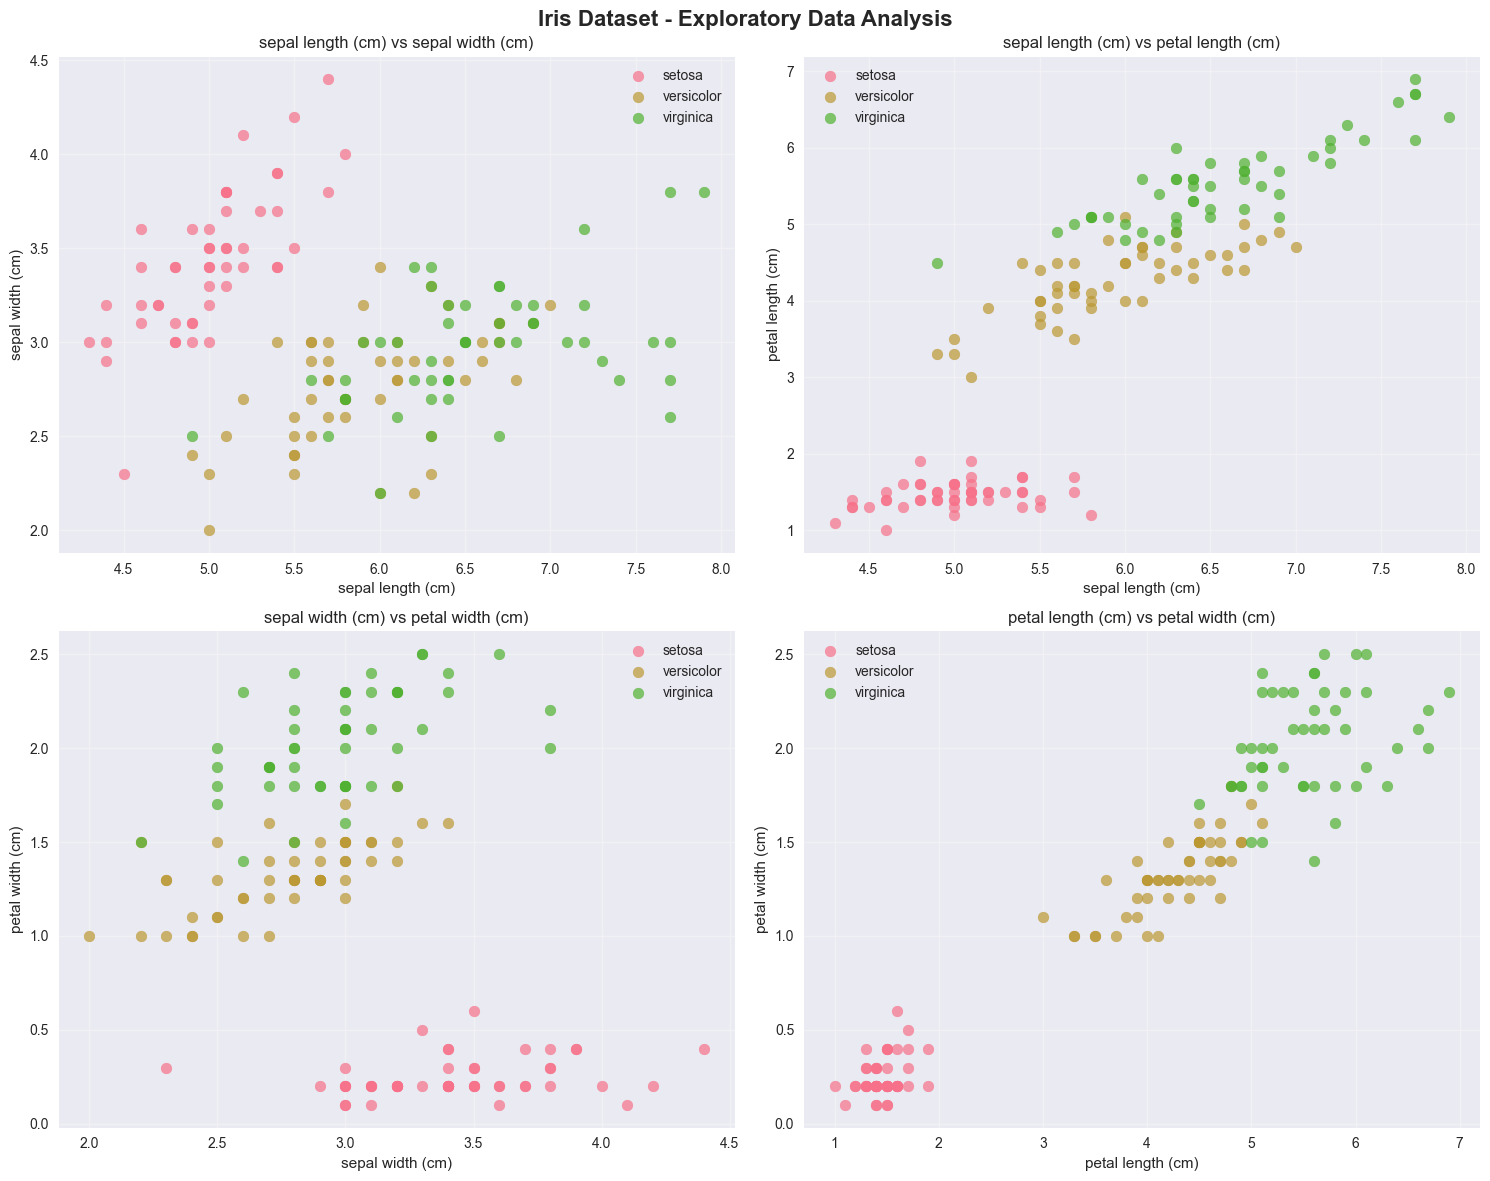

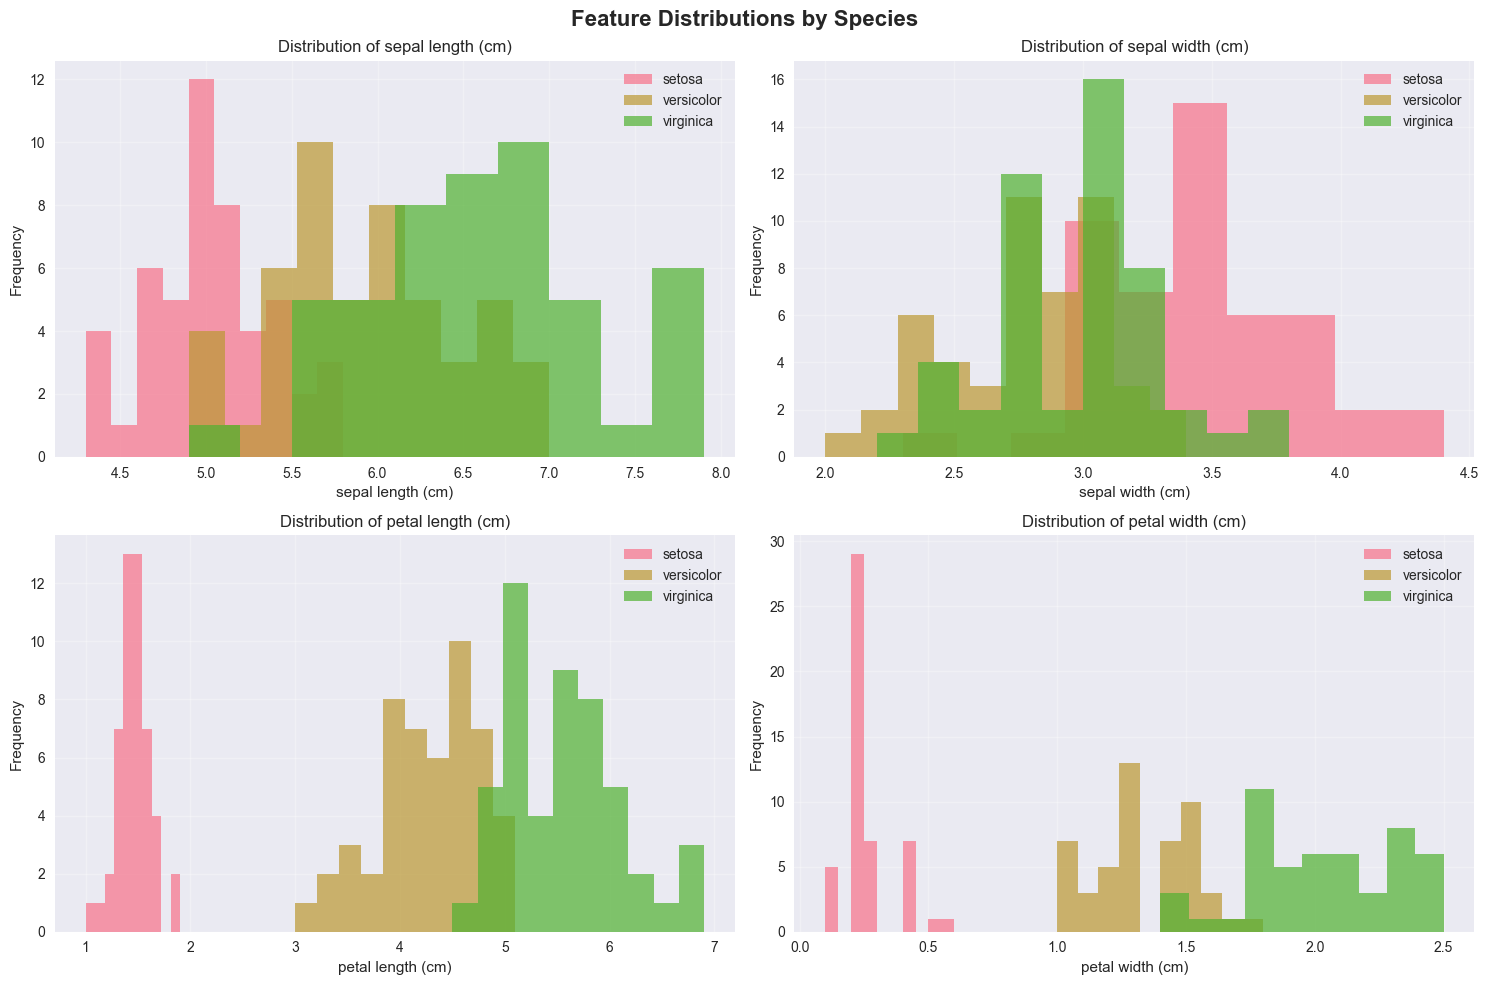

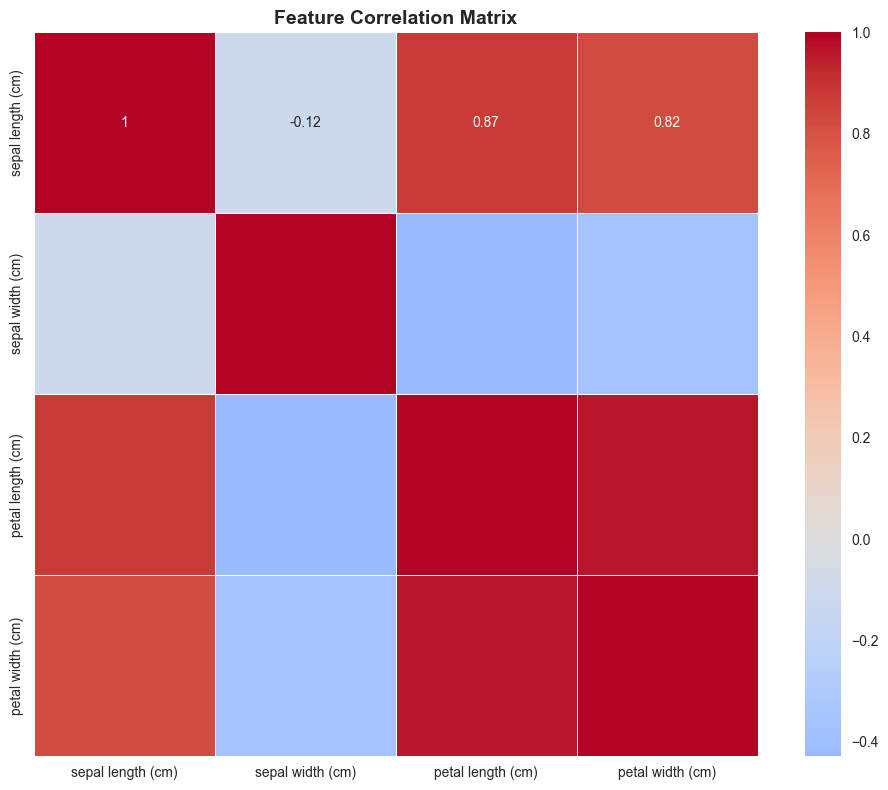

In [6]:
# 2. DATA VISUALIZATION

print("\n\n2. DATA VISUALIZATION")
print("-" * 25)

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Iris Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Pairwise scatter plots
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
combinations = [(0, 1), (0, 2), (1, 3), (2, 3)]

for idx, (i, j) in enumerate(combinations):
    ax = axes[idx // 2, idx % 2]
    for species in iris.target_names:
        mask = df['species'] == species
        ax.scatter(df[mask].iloc[:, i], df[mask].iloc[:, j], 
                  label=species, alpha=0.7, s=60)
    ax.set_xlabel(features[i])
    ax.set_ylabel(features[j])
    ax.set_title(f'{features[i]} vs {features[j]}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature distribution plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Feature Distributions by Species', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    for species in iris.target_names:
        data = df[df['species'] == species][feature]
        ax.hist(data, alpha=0.7, label=species, bins=10)
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# 3. DECISION TREE MODELING

print("\n\n3. DECISION TREE MODELING")
print("-" * 30)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Create and train the decision tree
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,  # Limit depth to avoid overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    criterion='gini'
)

dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)
y_train_pred = dt_classifier.predict(X_train)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")




3. DECISION TREE MODELING
------------------------------
Training set size: 105 samples
Test set size: 45 samples

Training Accuracy: 0.9714
Test Accuracy: 0.9333




4. MODEL EVALUATION
-------------------------
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



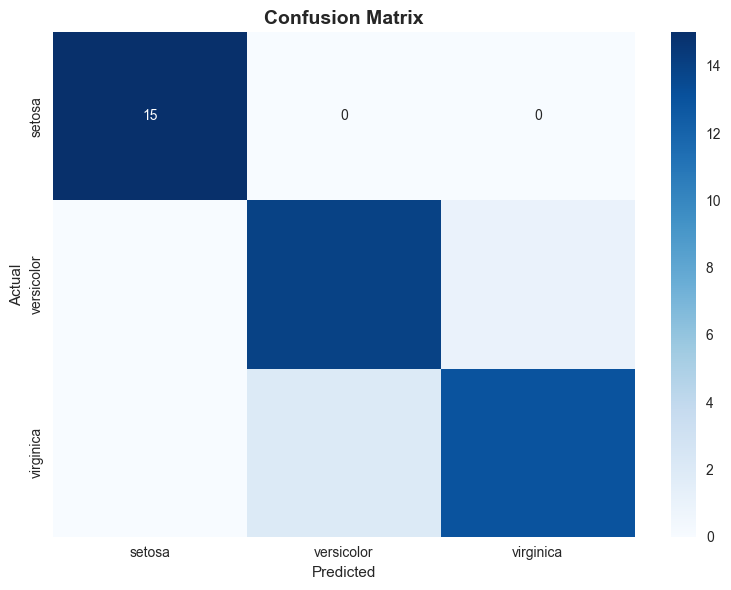


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV score: 0.9600 (+/- 0.0499)


In [8]:
# 4. MODEL EVALUATION

print("\n\n4. MODEL EVALUATION")
print("-" * 25)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Cross-validation scores
cv_scores = cross_val_score(dt_classifier, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



5. DECISION TREE VISUALIZATION
-----------------------------------
Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 1
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- class: 2



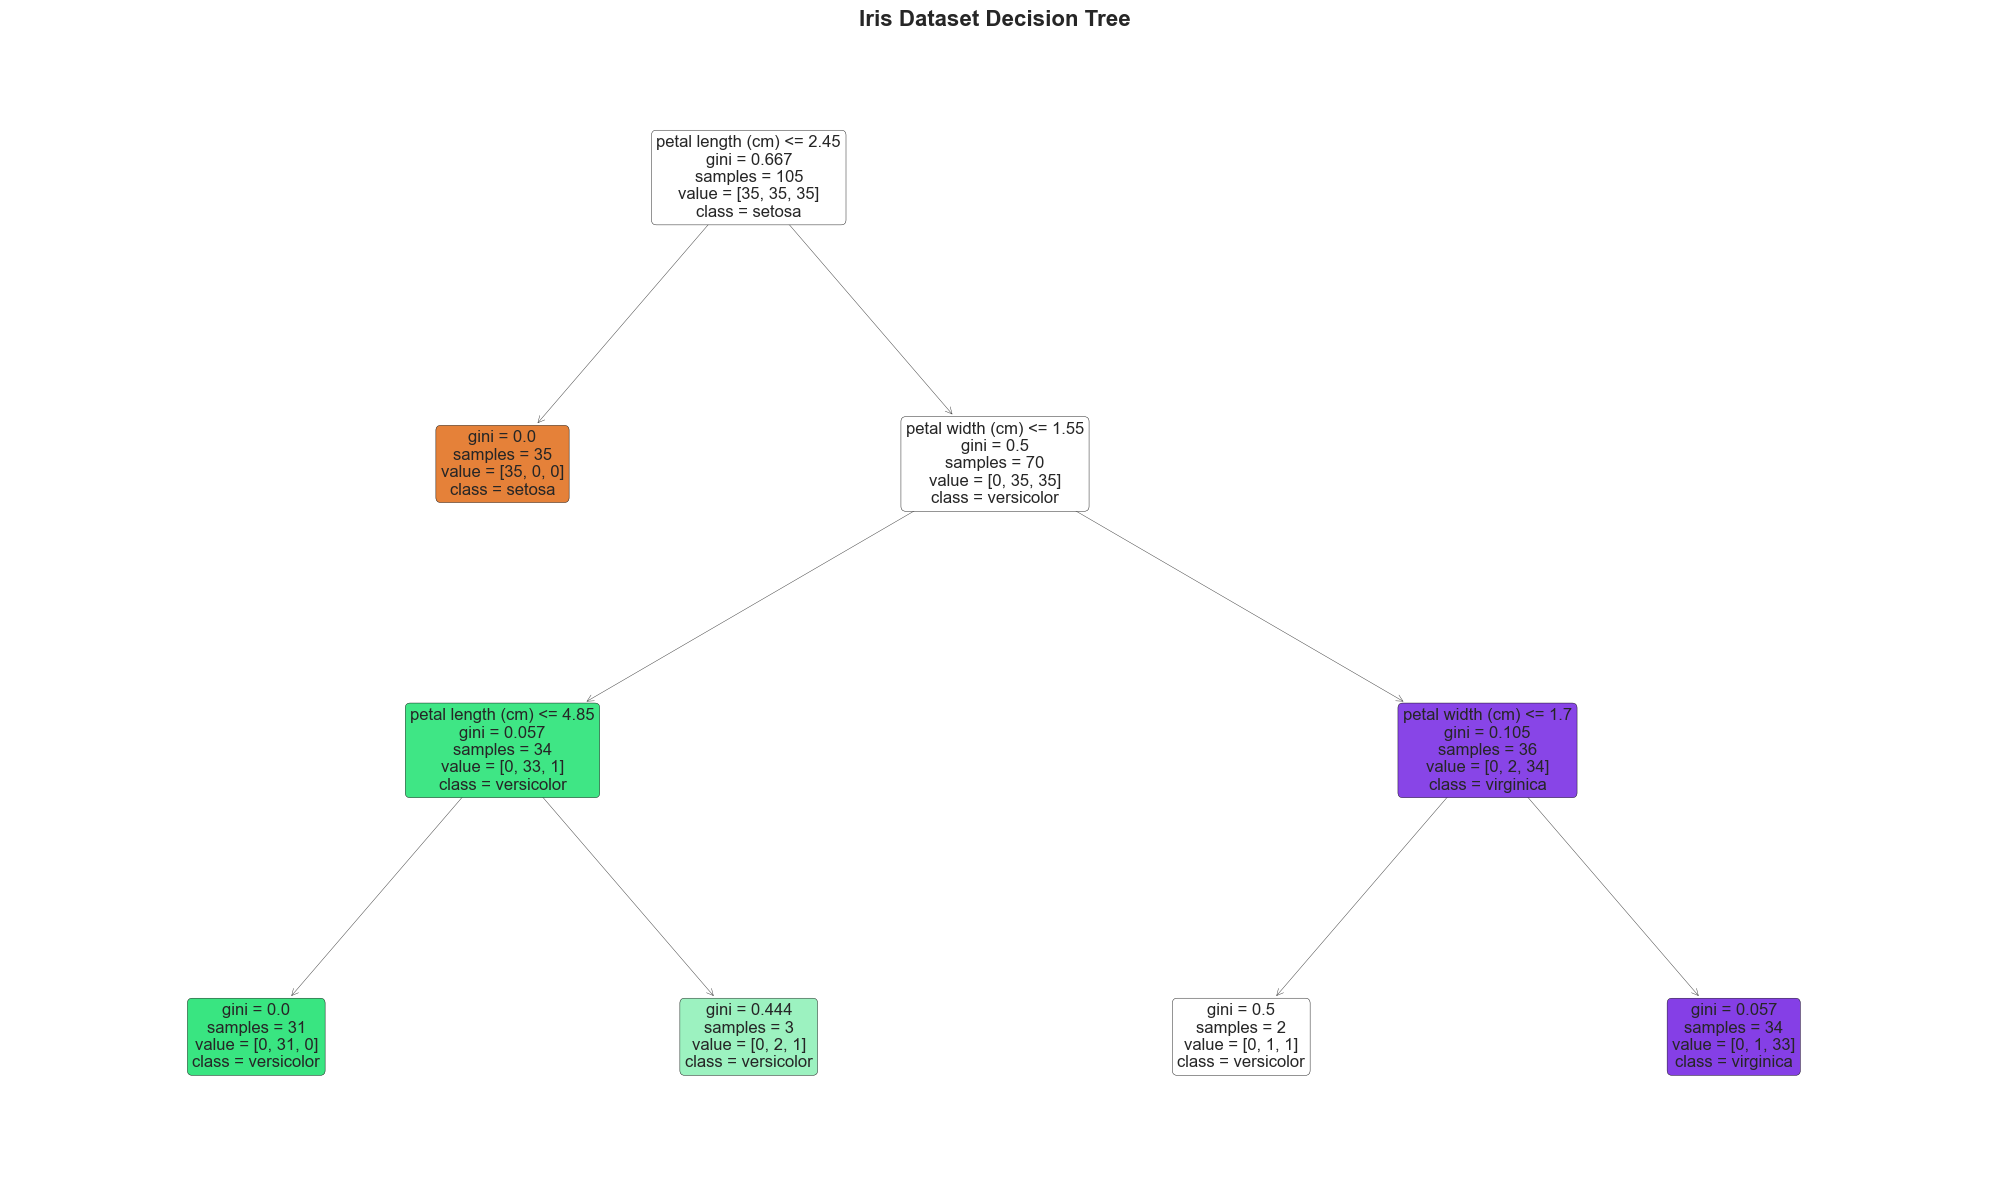

In [10]:
# 5. DECISION TREE VISUALIZATION

print("\n\n5. DECISION TREE VISUALIZATION")
print("-" * 35)

# Text representation of the tree
tree_rules = export_text(dt_classifier, feature_names=iris.feature_names)
print("Decision Tree Rules:")
print(tree_rules)

# Visual representation of the tree
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, 
          feature_names=list(iris.feature_names),
          class_names=list(iris.target_names),
          filled=True,
          rounded=True,
          fontsize=12)
plt.title('Iris Dataset Decision Tree', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



6. FEATURE IMPORTANCE
-------------------------
Feature Importances:
             feature  importance
2  petal length (cm)    0.541766
3   petal width (cm)    0.458234
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000


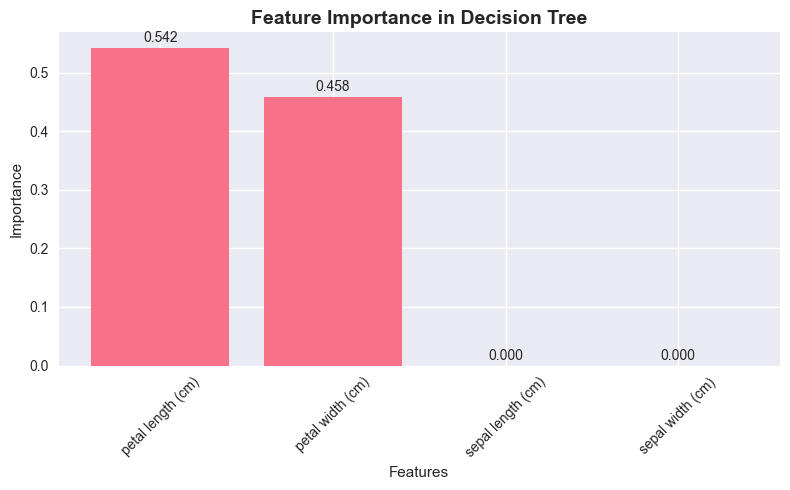

In [15]:
# 6. FEATURE IMPORTANCE

print("\n\n6. FEATURE IMPORTANCE")
print("-" * 25)

# Get feature importances
importances = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(8, 5))
bars = plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.title('Feature Importance in Decision Tree', fontsize=14, fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, importance in zip(bars, feature_importance_df['importance']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{importance:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




7. DECISION BOUNDARIES VISUALIZATION
----------------------------------------


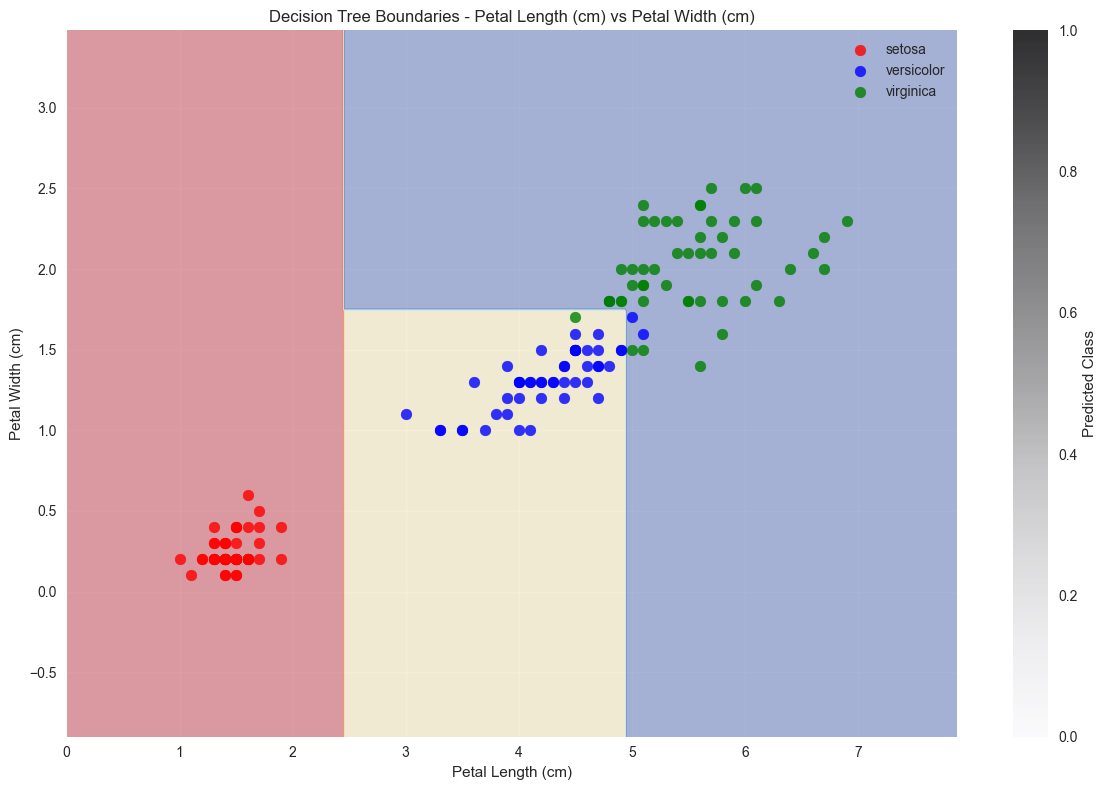

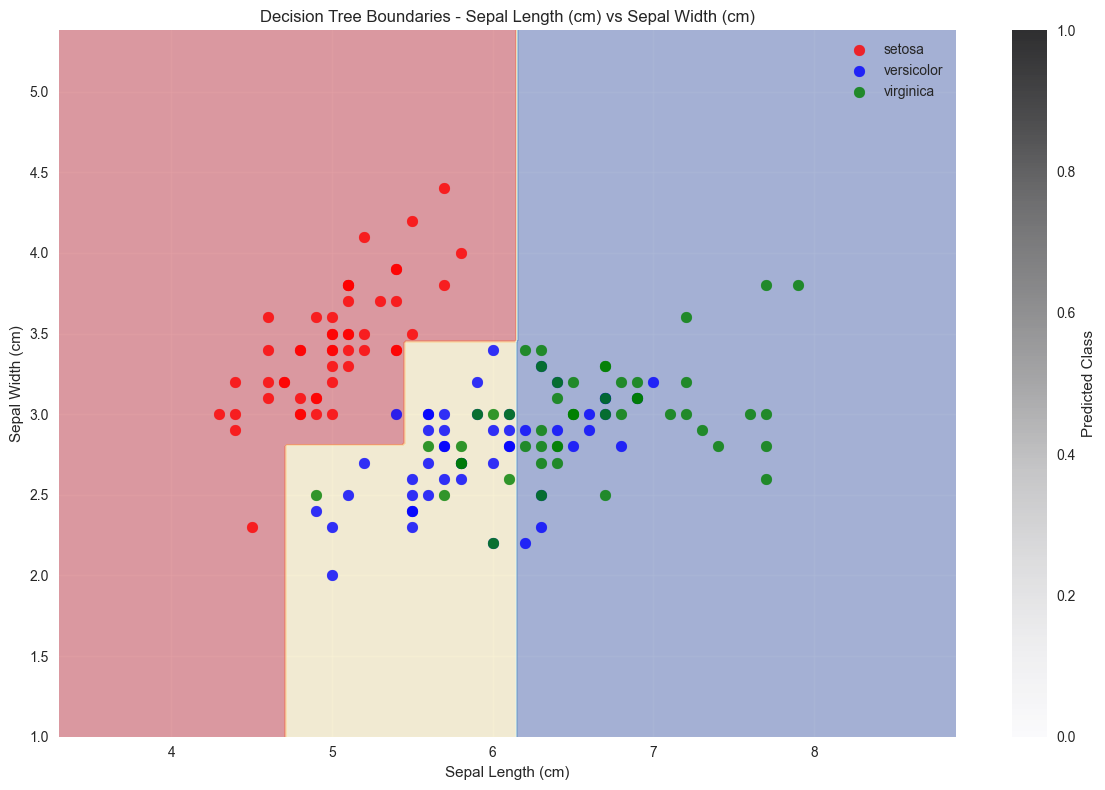

In [16]:
# 7. DECISION BOUNDARIES VISUALIZATION (2D)

print("\n\n7. DECISION BOUNDARIES VISUALIZATION")
print("-" * 40)

# Create a 2D visualization using the two most important features
# Based on feature importance, typically petal length and petal width
def plot_decision_boundaries(X_2d, y, feature_names, title_suffix=""):
    # Create a mesh
    h = 0.02
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Train a 2D decision tree
    dt_2d = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt_2d.fit(X_2d, y)
    
    # Predict on the mesh
    Z = dt_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    
    # Plot the data points
    colors = ['red', 'blue', 'green']
    for i, (color, species) in enumerate(zip(colors, iris.target_names)):
        plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], 
                   c=color, label=species, alpha=0.8, s=60)
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'Decision Tree Boundaries - {feature_names[0]} vs {feature_names[1]}{title_suffix}')
    plt.legend()
    plt.colorbar(label='Predicted Class')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot using petal features (most discriminative)
X_petal = X[:, [2, 3]]  # petal length and width
plot_decision_boundaries(X_petal, y, ['Petal Length (cm)', 'Petal Width (cm)'])

# Plot using sepal features
X_sepal = X[:, [0, 1]]  # sepal length and width
plot_decision_boundaries(X_sepal, y, ['Sepal Length (cm)', 'Sepal Width (cm)'])



8. MODEL COMPARISON
-------------------------
Max depth 2: Train=0.9714, Test=0.8889
Max depth 3: Train=0.9810, Test=0.9778
Max depth 4: Train=0.9905, Test=0.8889
Max depth 5: Train=1.0000, Test=0.9333
Max depth 6: Train=1.0000, Test=0.9333
Max depth None: Train=1.0000, Test=0.9333


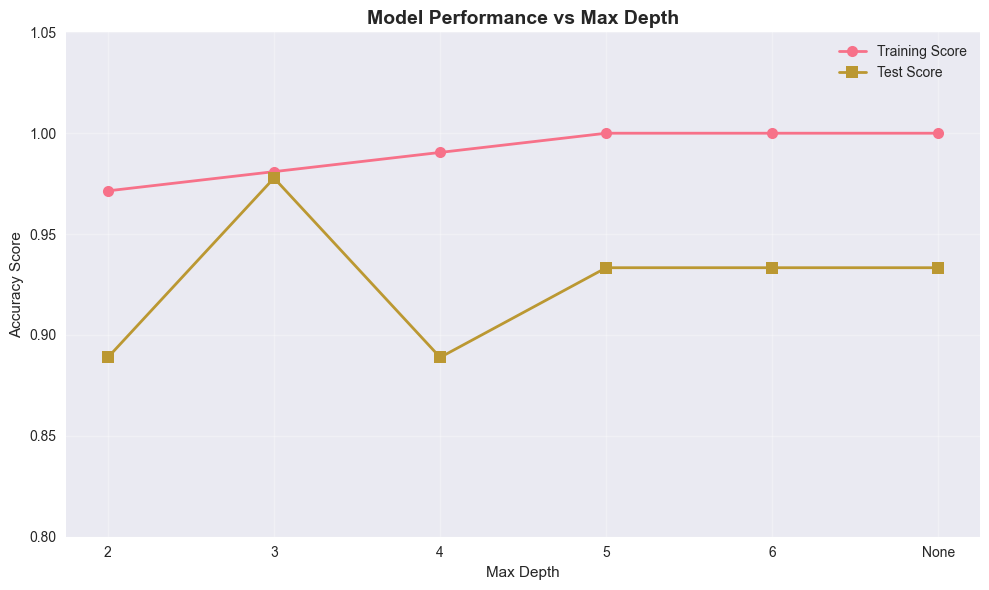

In [17]:
# 8. MODEL COMPARISON WITH DIFFERENT PARAMETERS

print("\n\n8. MODEL COMPARISON")
print("-" * 25)

# Compare different max_depth values
depths = [2, 3, 4, 5, 6, None]
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    depth_str = str(depth) if depth is not None else 'None'
    print(f"Max depth {depth_str}: Train={train_score:.4f}, Test={test_score:.4f}")

# Plot the comparison
plt.figure(figsize=(10, 6))
depth_labels = [str(d) if d is not None else 'None' for d in depths]
plt.plot(depth_labels, train_scores, 'o-', label='Training Score', linewidth=2, markersize=8)
plt.plot(depth_labels, test_scores, 's-', label='Test Score', linewidth=2, markersize=8)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Performance vs Max Depth', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.8, 1.05)
plt.tight_layout()
plt.show()


In [18]:
# 9. PREDICTIONS ON NEW DATA

print("\n\n9. MAKING PREDICTIONS ON NEW DATA")
print("-" * 40)

# Create some example new data points
new_samples = np.array([
    [5.0, 3.5, 1.5, 0.2],  # Likely Setosa
    [6.0, 3.0, 4.5, 1.5],  # Likely Versicolor
    [7.0, 3.2, 6.0, 2.0]   # Likely Virginica
])

predictions = dt_classifier.predict(new_samples)
probabilities = dt_classifier.predict_proba(new_samples)

print("Predictions on new samples:")
print("-" * 30)
feature_names_short = ['SepalL', 'SepalW', 'PetalL', 'PetalW']

for i, (sample, pred, prob) in enumerate(zip(new_samples, predictions, probabilities)):
    print(f"\nSample {i+1}: {dict(zip(feature_names_short, sample))}")
    print(f"Predicted class: {iris.target_names[pred]}")
    print("Probabilities:")
    for j, (species, probability) in enumerate(zip(iris.target_names, prob)):
        print(f"  {species}: {probability:.3f}")



9. MAKING PREDICTIONS ON NEW DATA
----------------------------------------
Predictions on new samples:
------------------------------

Sample 1: {'SepalL': 5.0, 'SepalW': 3.5, 'PetalL': 1.5, 'PetalW': 0.2}
Predicted class: setosa
Probabilities:
  setosa: 1.000
  versicolor: 0.000
  virginica: 0.000

Sample 2: {'SepalL': 6.0, 'SepalW': 3.0, 'PetalL': 4.5, 'PetalW': 1.5}
Predicted class: versicolor
Probabilities:
  setosa: 0.000
  versicolor: 1.000
  virginica: 0.000

Sample 3: {'SepalL': 7.0, 'SepalW': 3.2, 'PetalL': 6.0, 'PetalW': 2.0}
Predicted class: virginica
Probabilities:
  setosa: 0.000
  versicolor: 0.029
  virginica: 0.971


In [20]:
# 10. SUMMARY AND INSIGHTS

print("\n\n10. SUMMARY AND INSIGHTS")
print("-" * 30)

print("Key Findings:")
print("✅ Decision tree achieved high accuracy on the Iris dataset")
print(f"✅ Test accuracy: {test_accuracy:.4f}")
print("✅ The model shows excellent separation between species")
print("✅ Petal measurements are more discriminative than sepal measurements")
print(f"✅ Most important feature: {feature_importance_df.iloc[0]['feature']}")

print("\nDecision Tree Advantages:")
print("• Easy to interpret and visualize")
print("• No assumptions about data distribution")
print("• Handles both numerical and categorical features")
print("• Provides feature importance scores")

print("\nModel Characteristics:")
print(f"• Tree depth: {dt_classifier.get_depth()}")
print(f"• Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"• Number of features used: {np.sum(dt_classifier.feature_importances_ > 0)}")

print("\n" + "="*50)
print("Analysis Complete! 🎉")
print("="*50)



10. SUMMARY AND INSIGHTS
------------------------------
Key Findings:
✅ Decision tree achieved high accuracy on the Iris dataset
✅ Test accuracy: 0.9333
✅ The model shows excellent separation between species
✅ Petal measurements are more discriminative than sepal measurements
✅ Most important feature: petal length (cm)

Decision Tree Advantages:
• Easy to interpret and visualize
• No assumptions about data distribution
• Handles both numerical and categorical features
• Provides feature importance scores

Model Characteristics:
• Tree depth: 3
• Number of leaves: 5
• Number of features used: 2

Analysis Complete! 🎉
